![Universidad Central](https://www.ucentral.edu.co/sites/default/files/inline-images/identificadores-Centrados_en_ti_logo-h.png)

# <center>Trabajo 2</center>
# <center>Calidad de Datos</center>
<br><br>
# <center>Grupo 1</center>
# <center>John Garcia</center>
# <center>Andres Velez</center>
# <center>Brayan Vergel</center>

<br><br>


# <center>Presentado A:</center>
# <center>Jorge Victorino</center>
<br><br>
# <center>Universidad Central de Colombia</center>

# <center>Maestría en Analítica de Datos</center>

# <center>Programación para Analítica de Datos</center>

# <center>2022</center>




# New Section

## __Punto 1__

> - Hacer una función que crea y muestra un DataFrame a partir de las columnas de la
tabla en el archivo de entrada examen3.xlsx, los cuales deben ser:

1. Nombre de la columna del dataframe de entrada
2. Tipo de dato (incluido: int, float, string, datetime, boolean, categorical)
3. Tipo de variable (Continua, numérica discreta, categórica)
4. Cantidad de valores únicos
5. Cantidad de valores nulos
6. Valor que más se repite
7. Frecuencia del valor que más se repite
8. Valor máximo
9. Valor mínimo


In [ ]:
#Librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from tabulate import tabulate

In [ ]:
# PUNTO 1
def resumen_dataframe(df):
    '''
    resumen_dataframe: Realiza realiza un remen de las columnas del dataframe.
    ENTRADAS:
        Nombre del dataframe para resumir.
    SALIDAS:
        Dataframe "resumen".  
    '''
    columnas = df.columns.to_list()
    tipos_datos = [str(df.dtypes[i]) for i in columnas]
    tipo_variable = []
    for i in tipos_datos:
        if i.startswith('int'):
            tipo_variable.append('Numérica discreta')
        elif i.startswith('float'):
            tipo_variable.append('Continua')
        else:
            tipo_variable.append('Categórica')
    valores_unicos = [len(df[i].unique().tolist()) for i in columnas]
    valores_nulos = [df[i].isnull().sum() for i in columnas]
    moda = [df[i].mode().tolist()[-1] for i in columnas]
    frecuencia = [len(df[df[i]==j][i]) for i,j in zip(columnas,moda)]
    maximos, minimos = [],[]
    for i,j in zip(columnas,tipo_variable):
        if j == 'Categórica':
            maximos.append('No aplica')
            minimos.append('No aplica')
        else:
            maximos.append(str(df[i].max()))
            minimos.append(str(df[i].min()))

    resumen = pd.DataFrame({
        'Campo' : columnas,
        'Tipo de dato' : tipos_datos,
        'Tipo de variable' : tipo_variable,
        'Unicos' : valores_unicos,
        'Nulos' : valores_nulos,
        'Moda' : moda,
        'Frecuencia' : frecuencia,
        'Maximo' : maximos,
        'Minimo' : minimos
    })
    return resumen

> Se procede a la creación del dataframe, con la definición de las columnas, si es una variable entera agregarla como una numerica discreta, si es de tipo float, agregarla como una continua y sino volverla de tipo categorico.


> Continuando con el desarrollo del punto 1, se puede observar la nueva estructura del Dataframe, con el nombre de resumen.

In [ ]:
# PUNTO 1
datos = pd.read_excel('examen3.xlsx', sheet_name='examen')
resumen_df = resumen_dataframe(datos)
resumen_df.head()

,Campo,Tipo de dato,Tipo de variable,Unicos,Nulos,Moda,Frecuencia,Maximo,Minimo
0,IDE,int64,Numérica discreta,617,0,2106,2,2116,1500
1,programa,object,Categórica,7,0,Ingeniería Ambiental,236,No aplica,No aplica
2,IDG,object,Categórica,33,0,G9,24,No aplica,No aplica
3,corte1,float64,Continua,11,0,4.0,146,5.0,0.0
4,corte2,float64,Continua,11,0,3.0,115,5.0,0.0


## __Punto 2-6__

> - Analice el tipo de dato de cada columna para saber si es el correcto. Si no lo es, determine los valores que generan problemas y clasifique los tipos de problemas que aparecen. Luego cree una función que corrija los valores erróneos, y finalmente, verifique que queda el tipo correcto en cada columna. En este punto se entrega: las funciones que corrigen los datos y el reporte de los datos que cambiaron.
> - Haga un análisis de los valores faltantes, determine si se presenta algún problema de integridad con la ausencia de los datos. Si es así, use las reglas que definió en el punto 4 para rellenar con el dato apropiado. Se entrega un reporte de los cambios.

De acuerdo con el dataframe anterior se pueden analizar las siguientes variables:

La variable IDE, que corresponde a tipo llave o variable de identificación, presenta datos duplicados teniendo en cuenta que presenta un total de 617 registros únicos, y el total de la base 630 registros, por lo anterior se puede concluir que la base presenta 13 registros duplicados que se deben eliminar.

El único curso de la base de datos es Algoritmos y programación, la cantidad de créditos del curso son 3, el periodo es el número 2, y el año 2017 para todas las 630 observaciones.

> Se realiza una función para analizar las variables cualitativas donde se genera tabla de frecuencias y grafico de barras.

> Se realiza una función para analizar las variables cuantitativas que genera diagrama de caja y bigotes e histograma.

In [ ]:
def analisis_cualitativo(datos, variable):
    '''
    resumen_dataframe: Realiza análisis cualitativo univariado de variables cualitativas.
    ENTRADAS:
        Nombre del dataframe y variable
    SALIDAS:
        Tabla de frecuencias y grafico de barras.  
    '''
    a = pd.DataFrame(pd.value_counts(datos[variable]))
    a.reset_index(inplace=True)
    a.columns = [variable,'frecuencia absoluta']
    b = pd.DataFrame(100 * datos[variable].value_counts() / len(datos[variable])).round(1)
    b.reset_index(inplace=True)
    b.columns = [variable,'frecuencia relativa']
    df = a.merge(b)
    print(tabulate(df,headers=[variable, "frecuencia absoluta", "frecuencia relativa (%)"]))
    plot = datos[variable].value_counts().plot(kind='bar',
                                                title=variable)
    print('')
    plot
    return 

def analisis_cuantitativo(datos, variable):
    '''
    resumen_dataframe: Realiza análisis cuantitativo univariado de variables cualitativas.
    ENTRADAS:
        Nombre del dataframe y variable
    SALIDAS:
        Diagrama de caja y bigotes e histograma.
    '''
    df = datos.sort_values(by=[variable])
   
    fig = px.histogram(df, x=variable,nbins=20, opacity=0.5, marginal="box", title=variable)
    fig.update_layout(barmode='overlay')
    
    return fig.show()

>  Análisis variable **programa**

    programa                  frecuencia absoluta    frecuencia relativa (%)
--  ----------------------  ---------------------  -------------------------
 0  Ingeniería Ambiental                      236                       37.5
 1  Ingeniería De Sistemas                    144                       22.9
 2  Ingeniería Electrónica                     98                       15.6
 3  Ingeniería Industrial                      62                        9.8
 4  Ingeniería Mecánica                        59                        9.4
 5  Ingeniería Industial                       19                        3
 6  Ingeniería Electórnica                     12                        1.9



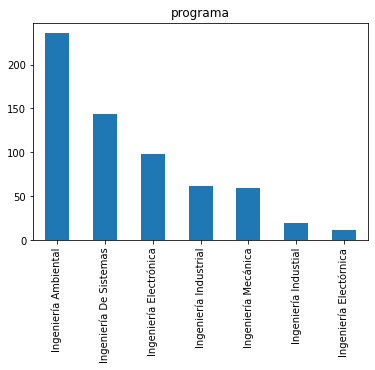

In [ ]:
analisis_cualitativo(datos,'programa')

Se identifica que existen 7 programas con diferente nombre, sin embargo, una de las categorías de ingeniería industrial presenta nombre con error de escritura, así como para ingeniería electrónica. Por último la carrera que más participación tiene es la de Ingeniería Ambiental con participación mayor a 200 registros.

> Análisis variable **IDG**


    IDG      frecuencia absoluta    frecuencia relativa (%)
--  -----  ---------------------  -------------------------
 0  G9                        24                        3.8
 1  G32                       24                        3.8
 2  G2                        23                        3.7
 3  G1                        23                        3.7
 4  G31                       23                        3.7
 5  G8                        23                        3.7
 6  G11                       23                        3.7
 7  G15                       22                        3.5
 8  G4                        22                        3.5
 9  G12                       22                        3.5
10  G17                       22                        3.5
11  G6                        22                        3.5
12  G14                       22                        3.5
13  G3                        22                        3.5
14  G33                       21        

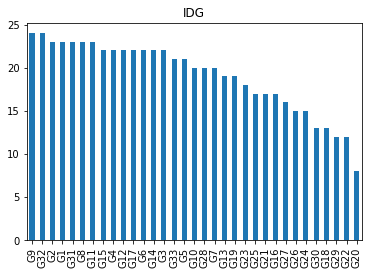

In [ ]:
analisis_cualitativo(datos,'IDG')

El id de grupo que tienen mayor participación son el G9 y G32, en total hay 33 grupos.

> Análisis variable **jornada**

    jornada      frecuencia absoluta    frecuencia relativa (%)
--  ---------  ---------------------  -------------------------
 0  día                          378                         60
 1  noche                        252                         40



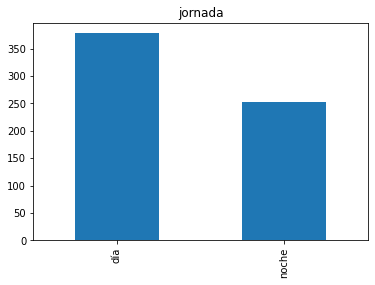

In [ ]:
analisis_cualitativo(datos,'jornada')

Existen 2 jornadas, día y noche, principalmente supera la jornada de día con más de 378 observaciones correspondiente al 60%.

> Análisis variable **profesor**

    profesor      frecuencia absoluta    frecuencia relativa (%)
--  ----------  ---------------------  -------------------------
 0  Artemisa                       62                        9.8
 1  Atenea                         45                        7.1
 2  Menelao                        45                        7.1
 3  Hefesto                        43                        6.8
 4  Agamenón                       43                        6.8
 5  Hermes                         35                        5.6
 6  Polidoro                       24                        3.8
 7  Hades                          24                        3.8
 8  Agenor                         23                        3.7
 9  Euforbo                        23                        3.7
10  Apolo                          23                        3.7
11  Patroclo                       23                        3.7
12  Dolón                          22                        3.5
13  Aquiles              

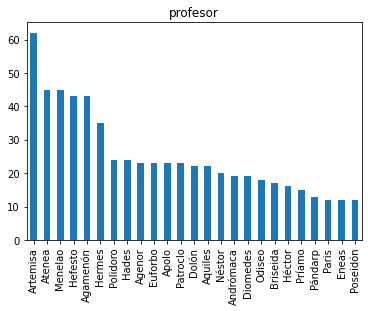

In [ ]:
analisis_cualitativo(datos,'profesor')

Se observa que hay 25 profesores, el profesor que más tiene frecuencia es Artemisa con parcicipación de 62 correspondiente al 10%, al contrario el profesor Paris, Eneas y poseidón tienen menos particpación con 25 cada uno.

> Análisis variable **dedicación**

    dedicacion      frecuencia absoluta    frecuencia relativa (%)
--  ------------  ---------------------  -------------------------
 0  Cátedra                         307                       48.7
 1  TC                              258                       41
 2  tc                               42                        6.7
 3  MT                               23                        3.7



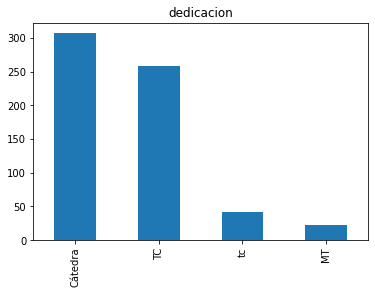

In [ ]:
analisis_cualitativo(datos,'dedicacion')

Se observa que la dedicación de profesores es más frecuente es Cátedra con 307 observaciones correspondiente a 49%, sin embargo, se evidencia que las categorias de TC y tc se deben unir.

> Análisis variable **sala**

    sala                           frecuencia absoluta    frecuencia relativa (%)
--  ---------------------------  ---------------------  -------------------------
 0  Centro de Computo Sala 7                        41                        6.5
 1  Centro de Computo Sala 10                       40                        6.3
 2  Casa Kra 4ta Salón 301                          40                        6.3
 3  Casa Kra 4ta Salón 204                          40                        6.3
 4  Centro de Computo Sala 6                        40                        6.3
 5  Casa Kra 4ta Salón  101                         40                        6.3
 6  Torre P Salón 201                               39                        6.2
 7  Centro de Computo Sala 8                        39                        6.2
 8  Centro de Computo Sala 9                        39                        6.2
 9  Centro de Computo Sala 11                       39                        6.2
10  Torre P Saló

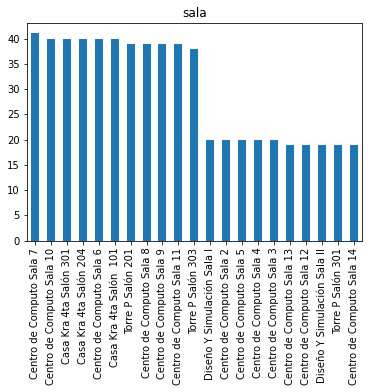

In [ ]:
analisis_cualitativo(datos,'sala')

Se observan 21 salas, las salas de Diseño y Simulación Sala I y II, se encuentran enumeradas en números romanos, sin embargos las demás tienen numeración decimal, posiblemente se pueda tratar de una inconsistencia.

> Análisis variable **fallas**

    fallas      frecuencia absoluta    frecuencia relativa (%)
--  --------  ---------------------  -------------------------
 0  0                           494                       78.4
 1  2                            36                        5.7
 2  3                            19                        3
 3  4                            12                        1.9
 4  6                            10                        1.6
 5  1                             9                        1.4
 6  8                             9                        1.4
 7  7                             6                        1
 8  10                            5                        0.8
 9  20                            4                        0.6
10  12                            4                        0.6
11  15                            3                        0.5
12  5                             3                        0.5
13  37                            2                        

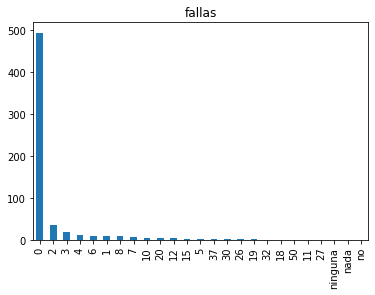

In [ ]:
analisis_cualitativo(datos,'fallas')

Teniendo en cuenta que la variable se clasificó como categórica se realiza el análisis cualitativo, se identifica que la variable es de tipo numérica, no obstante, presenta datos inconsistentes como son ‘ninguna’, ‘nada’ y ’no’, datos que pueden ser imputados por valores consistentes con el resto de la variable, lo anterior porque solo representan 3 observaciones de 630.

> Análisis variable **horaExamen**

    horaExamen      frecuencia absoluta    frecuencia relativa (%)
--  ------------  ---------------------  -------------------------
 0  9:00 a.m.                       396                       62.9
 1  6:00 p.m.                       234                       37.1



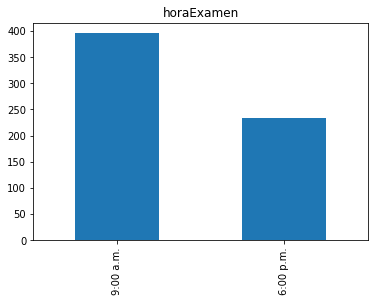

In [ ]:
analisis_cualitativo(datos,'horaExamen')

La hora de examen con mayor participación fue las 9:00 a.m.

> Análisis variable **corte1**

In [ ]:
analisis_cuantitativo(datos,"corte1")

Se observa que la mediana del corte1 es 3.5, la nota más frecuente es 4.

> Análisis variable **corte2**

In [ ]:
analisis_cuantitativo(datos,"corte2")

En el corte2 la nota más frecuente fue 3, igual que la mediana, aumentaron las notas en 0 con un total de 66.

> Análisis variable **prom**

In [ ]:
analisis_cuantitativo(datos,"prom")

La mediana de promedio de los cortes es de 3.25, se evidencian datos atípicos menores a 0.75.

> Análisis variable **fallaP**

In [ ]:
analisis_cuantitativo(datos,"fallaP")

Esta variable presenta datos atipicos con variación alta de los datos, el valor con mayor frecuencia es 0, es importante identificar la relación que tiene con la variable fallas.

> Análisis variable **nestud**

In [ ]:
analisis_cuantitativo(datos,"nestud")

Esta variable aparentemente relacionada con el profesor, se evidencia que el valor con más frecuencia es 23, al contrario de 8, por último su mediana es de 21.

> Análisis variable **inicio**

Teniendo en cuenta la dependencia de la hora del examen sobre la variable inicio se realizan dos análisis, uno para los que tienen hora de examante de 9:00 a.m. y otro para los que tienen hora de 6:00 p.m.

In [ ]:
datos_1 = datos[datos['horaExamen'] == '9:00 a.m.'].copy()
analisis_cuantitativo(datos_1,"inicio")

La mayoria de estudiantes iniciaron el examen a las 9:11 am correspondiente a 34, seguido de las 9:14 am correspondiente a 31, la media de inicio es de 9:12 am. Se evidencia inicio de examen a las 6:00 pm. por lo que es necesitario analizar que se deba cambiar la hora de presentación del examen.

In [ ]:
datos_2 = datos[datos['horaExamen'] == '6:00 p.m.'].copy()
analisis_cuantitativo(datos_2,"inicio")

La mayoria de estudiantes iniciaron el examen a las 6:14 pm correspondiente a 28 estudiantes, la media de inicio es de 6:18 am. Se evidencia inicio de examen a las 9:08 am. por lo que es necesitario analizar que se deba cambiar la hora de presentación del examen.

> Análisis variable **final**

Teniendo en cuenta la dependencia de la hora del examen sobre la variable inicio se realizan dos análisis, uno para los que tienen hora de examante de 9:00 a.m. y otro para los que tienen hora de 6:00 p.m.

In [ ]:
datos_1 = datos[datos['horaExamen'] == '9:00 a.m.'].copy()
analisis_cuantitativo(datos_1,"final")

La mayoria de estudiantes terminaron entre las 9:59 am y 10:22 am Se evidencia inicio de examen a las 6:45 pm. por lo que es necesitario analizar que se deba cambiar la hora de presentación del examen.

In [ ]:
datos_1 = datos[datos['horaExamen'] == '6:00 p.m.'].copy()
analisis_cuantitativo(datos_1,"final")

La mayoria de estudiantes terminaron entre las 6:57 pm y 7:23 pm Se evidencia inicio de examen a las 6:45 pm., el estudiante que presento termino más rapido fue a las 6:29 pm.

> Análisis variable **nota**

In [ ]:
analisis_cuantitativo(datos,"nota")

La nota media fue de 1.5 y la mayoria de estudiantes tienen una nota de 1 a 2.5, Se observa que existen notas mayores a 5, lo cual no es correspondiente con las notas por corte, por lo cual es importante revisar si se recalculan estos valores, con las notas por pregunta.

> Análisis variable **p1-p10**

In [ ]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=5)
fig.add_trace(go.Histogram(x=datos['p1'], nbinsx=2,name='p1'),row=1, col=1)
fig.add_trace(go.Histogram(x=datos['p2'], nbinsx=2,name='p2'),row=1, col=2)
fig.add_trace(go.Histogram(x=datos['p3'], nbinsx=2,name='p3'),row=1, col=3)
fig.add_trace(go.Histogram(x=datos['p4'], nbinsx=2,name='p4'),row=1, col=4)
fig.add_trace(go.Histogram(x=datos['p5'], nbinsx=2,name='p5'),row=1, col=5)
fig.add_trace(go.Histogram(x=datos['p6'], nbinsx=2,name='p6'),row=2, col=1)
fig.add_trace(go.Histogram(x=datos['p7'], nbinsx=2,name='p7'),row=2, col=2)
fig.add_trace(go.Histogram(x=datos['p8'], nbinsx=2,name='p8'),row=2, col=3)
fig.add_trace(go.Histogram(x=datos['p9'], nbinsx=2,name='p9'),row=2, col=4)
fig.add_trace(go.Histogram(x=datos['p10'], nbinsx=2,name='p10'),row=2, col=5)
fig.update_layout({'title': {'text':'Preguntas p1-p10','x': 0.5,'y': 0.9}})
fig.show()     

La pregunta con mayor desacierto fue la p6 con 379 observaciones en 0, seguido de la p3 con 354, la pregunta con más aciertos fue la p10 con 245, seguido de p9 con 244 aciertos. En conclusión, todas las preguntas predominaron los desaciertos.

Se crearon las funciones que corrigen los valores errones, modificando los faltantes y corrigiendo los problemas de integridad en la ausencia de datos en algunas de las columnas

In [ ]:
'''resumen_dataframe: Realiza la corrección de los tipos de datos
    ENTRADAS:
        Nombre del dataframe y variables
    SALIDAS:
        Tabla original y tabla con cambios
'''
# PUNTO 2 Y 6
def corregir_tipo_de_dato(df_received, summary):
  df = df_received.copy()
  campos = summary['Campo'].values.tolist()
  campo_afectado = []
  valor_original = []
  valor_reemplazado = []
  registro_afectado = []
  descripcion = []
  for k in campos:
    muestra = df[k].values.tolist().copy()
    entero = 0
    indices_entero = []
    flotante = 0
    indices_flotante = []
    texto = 0
    indices_texto = []
    for i,j in zip(muestra,range(len(muestra))):
      if type(i) == int:
        entero += 1
        indices_entero.append(j)
      elif type(i) == float:
        flotante += 1
        indices_flotante.append(j)
      else:
        texto += 1
        indices_texto.append(j)

    if entero == len(muestra) or flotante == len(muestra) or texto == len(muestra):
      if flotante == len(muestra):
        for i,j in zip(muestra, range(len(muestra))):
          if str(i)=='nan':
            registro_afectado.append(j)
            campo_afectado.append(k)
            valor_original.append(muestra[j])
            muestra[j] = summary[summary['Campo']==k]['Moda'].values.tolist()[0]
            valor_reemplazado.append(muestra[j])
            descripcion.append('Relleno de nulos')
      else:
        pass
    elif entero > flotante and entero > texto:
      if flotante != 0:
        for i in indices_texto:
          campo_afectado.append(k)
          valor_original.append(muestra[i])
          registro_afectado.append(i)
          descripcion.append('Convertir float a integer')
          try:
            muestra[i] = int(muestra[i]//1)
            valor_reemplazado.append(muestra[i])
          except: 
            muestra[i] = summary[summary['Campo']==k]['Moda'].values.tolist()[0]
            valor_reemplazado.append(muestra[i])
      if texto != 0:
        for i in indices_texto:
          valor_original.append(muestra[i])
          campo_afectado.append(k)
          registro_afectado.append(i)
          descripcion.append('Reemplazar string por entero')
          if muestra[i].find(';'): muestra[i] = muestra[i].replace(';','.')
          if muestra[i].find(','): muestra[i] = muestra[i].replace(',','.')
          if muestra[i].find(' '): muestra[i] = muestra[i].replace(' ','')
          try:
            muestra[i] = int(muestra[i])
            valor_reemplazado.append(muestra[i])
          except:
            muestra[i] = summary[summary['Campo']==k]['Moda'].values.tolist()[0]
            valor_reemplazado.append(muestra[i])
    elif flotante > entero and flotante > texto:
      if entero != 0:
        for i in indices_entero:
          campo_afectado.append(k)
          valor_original.append(muestra[i])
          registro_afectado.append(i)
          descripcion.append('Convertir entero a flotante')
          try:
            muestra[i] = float(muestra[i])
            valor_reemplazado.append(muestra[i])
          except: 
            muestra[i] = summary[summary['Campo']==k]['Moda'].values.tolist()[0]
            valor_reemplazado.append(muestra[i])
      if texto != 0:
        for i in indices_texto:
          valor_original.append(muestra[i])
          campo_afectado.append(k)
          registro_afectado.append(i)
          descripcion.append('Reemplazar string por float')
          if muestra[i].find(';'): muestra[i] = muestra[i].replace(';','.')
          if muestra[i].find(','): muestra[i] = muestra[i].replace(',','.')
          if muestra[i].find(' '): muestra[i] = muestra[i].replace(' ','')
          try:
            muestra[i] = float(muestra[i])
            valor_reemplazado.append(muestra[i])
          except:
            muestra[i] = summary[summary['Campo']==k]['Moda'].values.tolist()[0]
            valor_reemplazado.append(muestra[i])
    else:
      if flotante != 0:
        for i in indices_flotante:
          if str(muestra[i])=='nan':
            registro_afectado.append(i)
            descripcion.append('Reemplazar None por String')
            campo_afectado.append(k)
            valor_original.append(muestra[i])
            muestra[i] = summary[summary['Campo']==k]['Moda'].values.tolist()[0]
            valor_reemplazado.append(muestra[i])

    df[k] = pd.Series(muestra)
  
  modificaciones = pd.DataFrame({
    'Registro': registro_afectado,
    'Columna modificada': campo_afectado,
    'Valor original': valor_original,
    'Valor imputado': valor_reemplazado,
    'Descripcion': descripcion
  })
  
  return modificaciones, df

Se procede a realizar las correcciones de las variables anteriores, esto para garantizar la calidad de los datos y el desarrollo de los códigos posteriores

In [ ]:
# PUNTO 2 Y 6
log_modificaciones_1, datos = corregir_tipo_de_dato(datos, resumen_df)
resumen_df = resumen_dataframe(datos)
resumen_df.head()

,Campo,Tipo de dato,Tipo de variable,Unicos,Nulos,Moda,Frecuencia,Maximo,Minimo
0,IDE,int64,Numérica discreta,617,0,2106,2,2116,1500
1,programa,object,Categórica,7,0,Ingeniería Ambiental,236,No aplica,No aplica
2,IDG,object,Categórica,33,0,G9,24,No aplica,No aplica
3,corte1,float64,Continua,11,0,4.0,146,5.0,0.0
4,corte2,float64,Continua,11,0,3.0,115,5.0,0.0


> Se puede observar la tabla los datos originales y cada una de las reglas creadas por columnas

In [ ]:
# PUNTO 2 Y 6
log_modificaciones_1.head()

,Registro,Columna modificada,Valor original,Valor imputado,Descripcion
0,121,fallas,nada,0,Reemplazar string por entero
1,168,fallas,ninguna,0,Reemplazar string por entero
2,543,fallas,no,0,Reemplazar string por entero
3,26,inicio,NaN,09:11:00,Reemplazar None por String
4,29,inicio,NaN,09:11:00,Reemplazar None por String


> Se puede observar en la tabla, las modificaciones realizadas a los datos, columna modificada, valor original, valor imputado y la descripción del cambio realizado por fila.

## __Punto 3__

> - Haga una gráfica de distribución univariada por cada columna numérica. Si la
variable es categórica y tiene menos de 30 categorías haga una gráfica de barras
ordenada de mayor a menor con la frecuencia de cada categoría. En este punto se
entrega gráficas por cada variable, la gráfica debe tener etiquetas de valores en los ejes, título, y un texto que hace un comentario o conclusión acerca de lo que se ve en la gráfica.

In [ ]:
'''resumen_dataframe: Realizar los gráficos univariados de las variables cuantitativas y cualitativas
    ENTRADAS:
        Nombre del dataframe y df_resumen.
    SALIDAS:
        Gráficas de Histograma univariadas cuantitativas y cualitativas.
'''
# PUNTO 3
def graficas_univariadas(df, summary):
  campos_continuos = summary[summary['Tipo de variable']=='Continua']['Campo'].tolist()
  filas = len(campos_continuos)//3 + (1 if len(campos_continuos)%3 != 0 else 0)
  plt.figure(figsize=(24,14))
  colores = {
      1:'Gold', 2:'Blue', 3:'Orange',
      4:'Green', 5:'Yellow',
      6:'Purple',7:'Gray', 8:'Maroon', 9:'Black'
  }
  control_color = 1
  for i,j in zip(campos_continuos, range(len(campos_continuos))):
    plt.subplot(filas,3,j+1)
    x = df[i]
    plt.hist(x, density=True, label=i, color=colores[control_color])
    mn, mx = plt.xlim()
    plt.xlim(mn, mx)
    kde_xs = np.linspace(mn, mx, 301)
    kde = st.gaussian_kde(x)
    plt.plot(kde_xs, kde.pdf(kde_xs), label="Ajuste", color = ('red' if colores[control_color]!='red' else 'blue'))
    plt.legend(loc=("upper right" if j+1 > 3 else "upper left"))
    plt.ylabel('Probability')
    plt.xlabel(i)
    titulo = 'Histograma de ' + i
    plt.title(titulo)
    control_color +=1
    if control_color >9:
      control_color = 1
    plt.subplots_adjust(left=0.1,
                      bottom=0, 
                      right=0.8, 
                      top=0.8, 
                      wspace=0.4, 
                      hspace=0.4)
  plt.show()

> A continuación se pueden observar cada una de las gráficas univariadas continuas, por cada una de las variables con su respectivo histograma

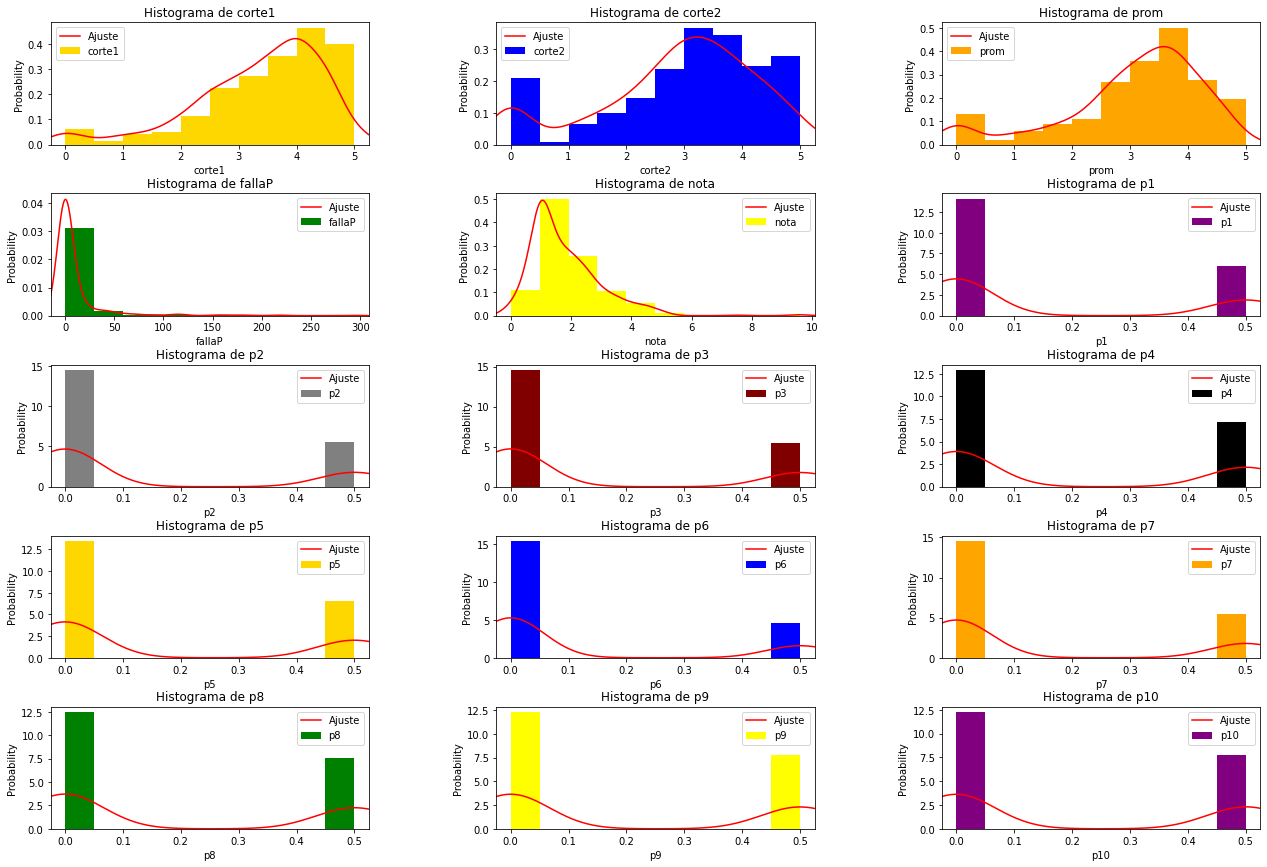

In [ ]:
# PUNTO 3
graficas_univariadas(datos, resumen_df)

- Se continua con las variables discretas y su respectivo gráfico univariado

In [ ]:
'''resumen_dataframe: Realizar los gráficos univariados de las variables cuantitativas y cualitativas
    ENTRADAS:
        Nombre del dataframe y df_resumen.
    SALIDAS:
        Gráficas de Histograma univariadas cuantitativas y cualitativas.
'''
# PUNTO 3
def graficas_univariadas_discretas(df, summary):
  colores = {
        1:'Gold', 2:'Blue', 3:'Orange',
        4:'Green', 5:'Yellow',
        6:'Purple',7:'Gray', 8:'Maroon', 9:'Black'
    }

  campos = summary[summary['Tipo de variable'].isin(['Categórica','Numérica discreta'])].copy()
  campos = campos[campos['Unicos']<=30]['Campo'].values.tolist()
  filas = len(campos)//3 + (1 if len(campos)%3 != 0 else 0)
  control_color = 1
  plt.figure(figsize=(35,15))
  for i,j in zip(campos, range(len(campos))):
    plt.subplot(filas,3,j+1)
    frecuencias = pd.DataFrame(df[i].value_counts())
    frecuencias.reset_index(inplace=True)
    frecuencias.sort_values(by=i, ascending=False, inplace=True)
    x = frecuencias['index'].values.tolist()
    y = frecuencias[i].values.tolist()
    plt.bar(list(range(len(x))),y,color=colores[control_color])
    plt.xticks(list(range(len(x))),x,rotation='vertical')
    for h in range(len(y)):
      plt.text(h,y[h],y[h],ha='center',bbox = dict(facecolor = 'white', alpha =0.8))
    plt.xlabel(i)
    plt.ylabel('Frecuencia')
    titulo = 'Frecuencias por ' + i
    plt.title(titulo)
    control_color+=1
    if control_color > 9:
      control_color=1
  plt.subplots_adjust(left=0.1,
                        bottom=0, 
                        right=0.8, 
                        top=2, 
                        wspace=0.4, 
                        hspace=0.4)
  plt.show()

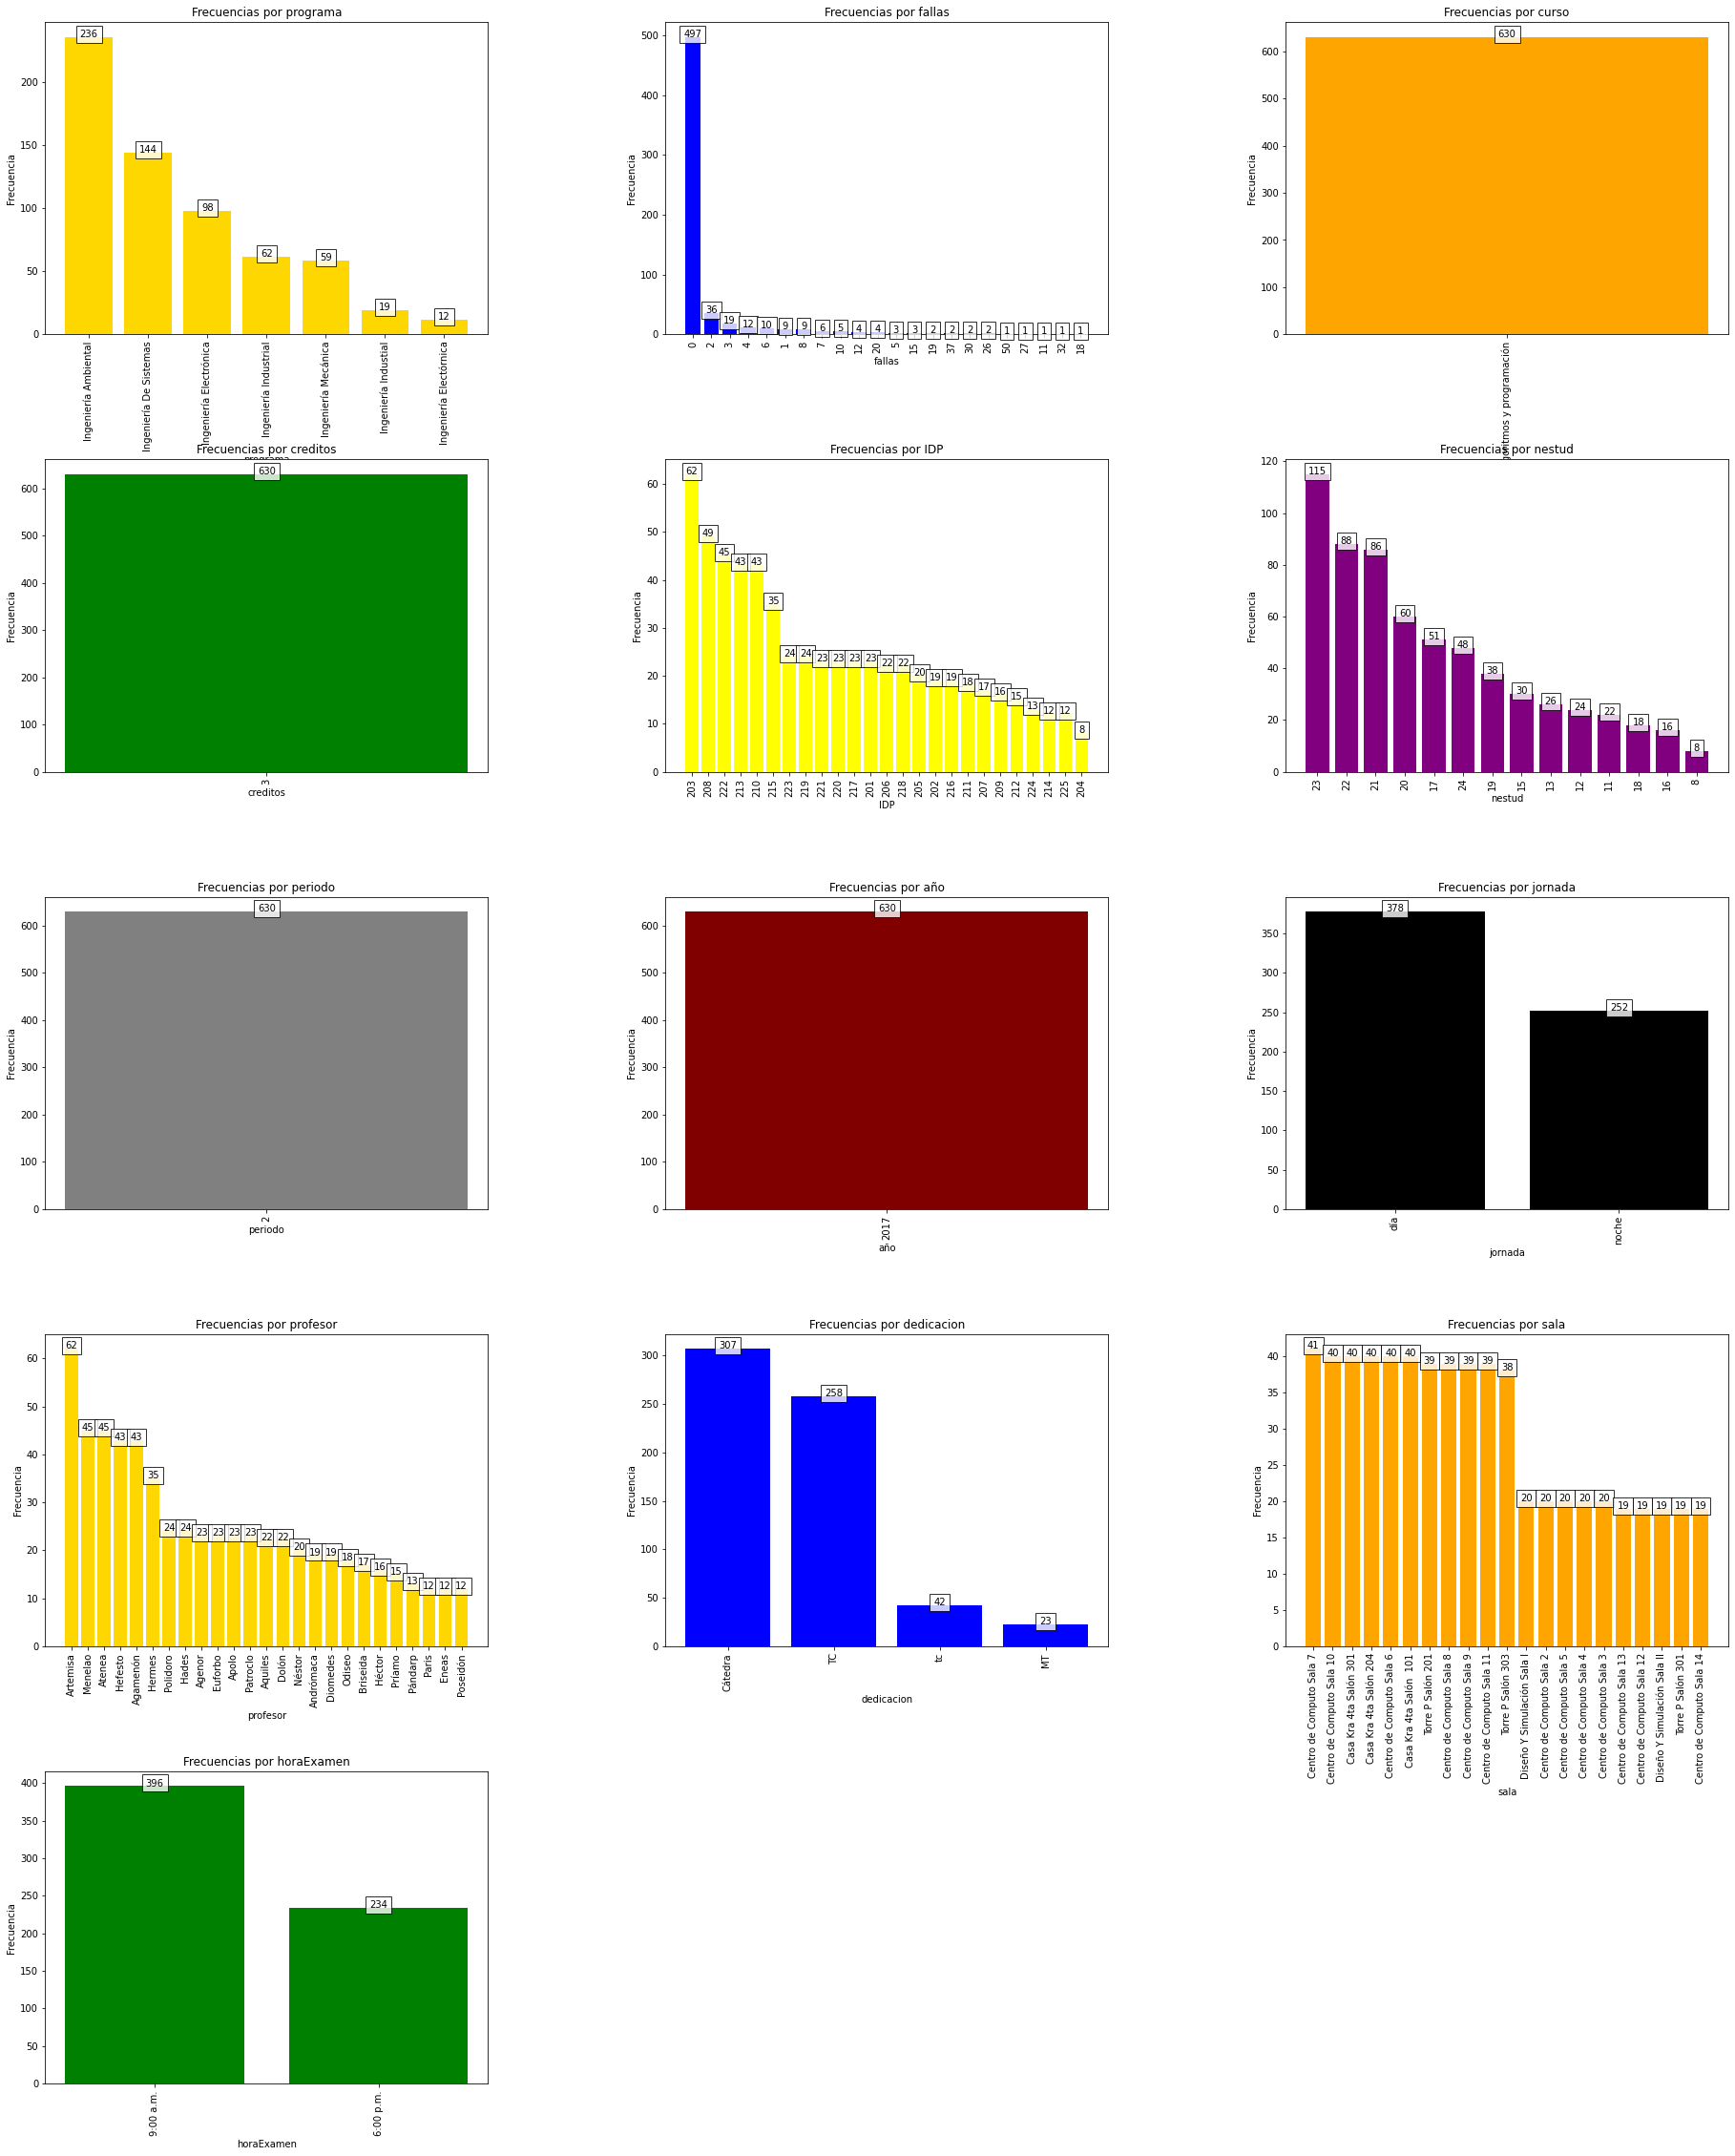

In [ ]:
# PUNTO 3
graficas_univariadas_discretas(datos, resumen_df)

## __Punto 4__

> - Para las variables numéricas, haga un mapa de correlación y analice qué variables tienen una fuerte relación. Luego, haga un gráfico de distribución bivariada con las columnas que tienen una fuerte relación y use esto para deducir reglas entre las variables. En este punto se entrega: gráfica comentada de correlación, gráfica comentada de análisis bivariado y un listado de las reglas encontradas.

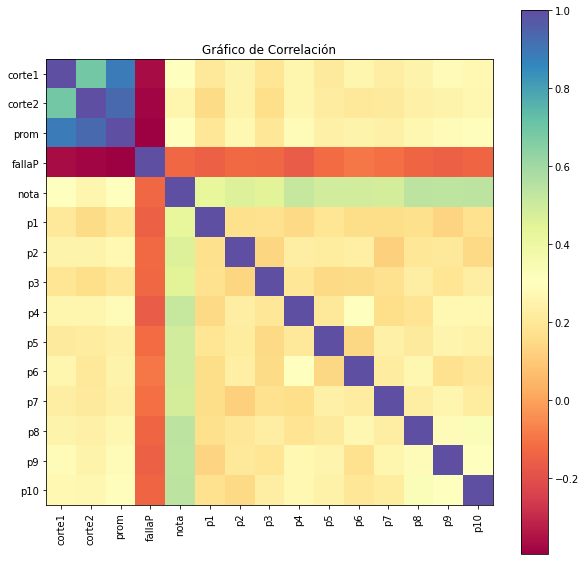

In [ ]:
'''resumen_dataframe: Realiza la corrección de los tipos de datos
    ENTRADAS:
        Nombre del dataframe y variables
    SALIDAS:
        Gráfico de correlaciones
'''
# PUNTO 4
campos_numericos = resumen_df[resumen_df['Tipo de variable']=='Continua']['Campo'].to_list()
df_corr = datos[campos_numericos].corr()
tick_marks = [i for i in range(len(df_corr.columns))]
f = plt.figure(figsize=(10, 10))
plt.imshow(df_corr, cmap='Spectral', interpolation='nearest')
plt.colorbar()
plt.xticks(tick_marks, df_corr.columns, rotation='vertical')
plt.yticks(tick_marks, df_corr.columns)
plt.title('Gráfico de Correlación')
plt.show()

- Se puede observar como el gráfico muestra una fuerte correlación entre las variables: cortes 1, 2 y el promedio, siendo el promedio el que muestra una intensidad más fuerte con estas dos variables, mientras que las variables restantes, nota, fallasP y p1 a p10, muestran una correlación débil o nula.

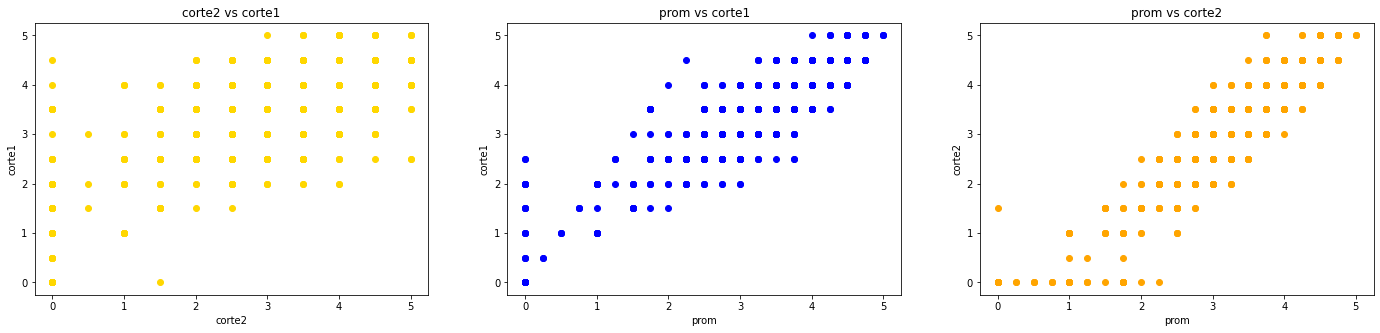

In [ ]:
'''resumen_dataframe: Realiza la corrección de los tipos de datos
    ENTRADAS:
        Nombre del dataframe y variables
    SALIDAS:
        Gráficos con fuerte correlación entre variables
'''
# PUNTO 4
df_corr2 = df_corr.copy()
campos_numericos = df_corr2.columns.tolist()
for i in campos_numericos:
  df_corr2[i] = df_corr2[i].map(lambda x: None if 0 < abs(x) < 0.6 else (None if abs(x)==1 else x))
df_corr2.reset_index(inplace=True)

relaciones = []
indexador = 1

for i in campos_numericos:
  valores = df_corr2[i].values.tolist()[indexador:]
  indices = df_corr2['index'].values.tolist()[indexador:]
  for j,k in zip(valores,indices):
    #print(type(j))
    if type(j)==float:
      if abs(j) > 0:
        try:
          relaciones.append([k,i])
        except:
          pass
  indexador += 1

colores = {
        1:'Gold', 2:'Blue', 3:'Orange',
        4:'Green', 5:'Yellow',
        6:'Purple',7:'Gray', 8:'Maroon', 9:'Black'
    }
control_color = 1
plt.figure(figsize=(24,5))
for i,j in zip(relaciones,range(len(relaciones))):
  plt.subplot(1,3,j+1)
  plt.scatter(datos[i[0]], datos[i[1]], color=colores[control_color])
  titulo = str(i[0]) + ' vs ' + str(i[1])
  plt.title(titulo)
  plt.xlabel(i[0])
  plt.ylabel(i[1])
  control_color += 1
  if control_color%len(relaciones)==1:
    control_color=1
plt.show()

> - Al realizar la gráfica de correlaciones se pudo observar que 3 variables mostraban una correlación fuerte y como entre ellas se formaban relaciones, tal como se puede ver en el anterior gráfico:
- Corte 2 vs Corte 1 muestran una correlación alta, al ubicarse entre 3 y 4.5 la mayor cantidad de datos.
- Promedio vs Corte 1, la relación es un poco menos agrupada que la anterior y muestra una simetría que se desplaza hacía la izquierda, con una mayor cantidad de notas del corte entre 0 y 3.
- Promedio vs Corte 2, la realación se agrupa más hacía la derecha con una asimetía postivia en las notas las cuales se agrupan más entre 3 y 5.

## __Punto 5__

Para las variables categóricas y ordinales busque relaciones de jerarquía entre las clases. Si encuentra relación entre las categorías de dos o más variables defina y enumere reglas, por ejemplo, si se tienen columnas como Continente, País y Ciudad, hay una relación jerárquica. Regla 1: los países están contenidos en un solo continente, regla 2: las ciudades perteneces a un solo país. En este punto se entrega una lista de reglas.


In [ ]:
'''resumen_dataframe: Realiza la corrección de los tipos de datos
    ENTRADAS:
        Nombre del dataframe y variables
    SALIDAS:
        Reglas de jerarquia entre las clases.
'''
# PUNTO 5
campos = resumen_df[(resumen_df['Tipo de variable']=='Categórica') & (resumen_df['Unicos']<15)]['Campo'].tolist()
h = 0
for i in campos[h:]:
  for j in campos[h+1:]:
    jerarquia = datos.groupby([i,j])[[j]].count()
    jerarquia.rename(columns = {j:'conteo'},inplace=True)
    jerarquia.reset_index(inplace=True)
    jerarquia = pd.pivot_table(jerarquia, values='conteo', index=[i],columns=[j], aggfunc=np.sum)
    jerarquia.fillna(0, inplace=True)
    jerarquia.reset_index(inplace=True)
    print(i,' vs ',j)
    print(jerarquia)
    print()
  h+=1

programa  vs  curso
curso                programa  Algoritmos y programación
0        Ingeniería Ambiental                        236
1      Ingeniería De Sistemas                        144
2      Ingeniería Electrónica                         98
3      Ingeniería Electórnica                         12
4        Ingeniería Industial                         19
5       Ingeniería Industrial                         62
6         Ingeniería Mecánica                         59

programa  vs  jornada
jornada                programa  día  noche
0          Ingeniería Ambiental  144     92
1        Ingeniería De Sistemas   98     46
2        Ingeniería Electrónica   63     35
3        Ingeniería Electórnica    8      4
4          Ingeniería Industial   12      7
5         Ingeniería Industrial   30     32
6           Ingeniería Mecánica   23     36

programa  vs  dedicacion
dedicacion                programa  Cátedra    MT     TC    tc
0             Ingeniería Ambiental    115.0   0.0  110.0  11

In [ ]:
'''resumen_dataframe: Realiza la corrección de los tipos de datos
    ENTRADAS:
        Nombre del dataframe y variables
    SALIDAS:
        Gráfico con jerarquias
'''
#punto 5
import plotly.express as px
import plotly.graph_objects as go

fig = px.treemap(datos, path=[px.Constant("Estudiantes por profesor"), 'jornada', 'profesor','programa'], values='nestud',
                  color='nota', color_continuous_scale='RdBu', color_continuous_midpoint=3)
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

> A continuación se relacionan las 10 reglas encontradas:

1. El curso de algoritmo y programación se encuentra contenido dentro del programa, sea Ingeniería de sistemas, Ingeniería Ambiental, etc..
2. La jornada sea de día o de noche, se encuentra contenida en el programa.
3. La dedicación de las horas asignadas sea Medio tiempo, Tiempo completo o Cátedra, se encuentra contenida en el programa.
4. La hora del éxamen realizado sea 6 am o 9am, se encuentra contenida dentro del programa.
5. La jornada sea de día o de noche, se encuentra contenida dentro del curso de algoritmos y programación.
6. La dedicación de las horas asignadas sea Medio tiempo, Tiempo completo o Cátedra, se encuentra contenida dentro del curso.
7. La hora del éxamen realizado sea 6 am o 9am, se encuentra contenida dentro del curso.
8. La jornada sea de día o de noche, se encuentra contenida en la dedicación de las horas asignadas.
9. La jornada sea de día o de noche, se encuentra contenida La hora del éxamen realizado sea 6 am o 9am.
10. La hora del éxamen realizado sea 6 am o 9am, se encuentra contenida en la dedicación de las horas asignadas.
11. Un profesor puede tener más de un grupo asignado.

## __Punto 7__

> - Analice la ocurrencia de datos duplicados con todos los atributos y con las
columnas: {IDE, curso, créditos}. Evalúe si es necesario eliminar registros duplicados para mejorar la calidad de los datos, en tal caso proceda a eliminarlos. Se entrega un reporte de los cambios.

In [ ]:
'''resumen_dataframe: Realiza la corrección de los tipos de datos
    ENTRADAS:
        Nombre del dataframe y variables
    SALIDAS:
        Tabla original y tabla con duplicados eliminados
'''
# PUNTO 7
def duplicados(df_received, summary):
  df = df_received.copy()
  campos = summary['Campo'].values.tolist()
  campo_afectado = []
  valor_original = []
  valor_reemplazado = []
  registro_afectado = []
  descripcion = []

  df.drop_duplicates(inplace=True)

  registro_afectado.append('Todo el dataframe')
  campo_afectado.append('Todo el dataframe')
  valor_original.append('Duplicados')
  valor_reemplazado.append('Duplicados')
  descripcion.append('Duplicados')

  prueba = pd.DataFrame(df.groupby(['IDG','curso','IDE'])['IDE'].count())
  prueba = prueba[prueba['IDE']>1]
  prueba.rename(columns = {'IDE':'conteo'},inplace=True)
  prueba.reset_index(inplace=True)
  estudiantes = prueba['IDE'].tolist()
  registros_borrados = []

  for i in estudiantes:
    registros_borrados.append(min(df[df['IDE']==i].index.tolist()))
  df.drop(registros_borrados, axis=0, inplace=True)

  for i in registros_borrados:
     registro_afectado.append(i)
     campo_afectado.append('Todo el dataframe')
     valor_original.append('Duplicados')
     valor_reemplazado.append('Duplicados')
     descripcion.append('Se eliminó la duplicidad por IDG-IDE')

  modificaciones = pd.DataFrame({
    'Registro': registro_afectado,
    'Columna modificada': campo_afectado,
    'Valor original': valor_original,
    'Valor imputado': valor_reemplazado,
    'Descripcion': descripcion
  })

  return modificaciones, df

- Se realizo una función para verificar que datos podrían estar duplicados en las variables IDG, IDE, curso, dentro del dataframe, es por ello que se procede a realizar una tabla de prueba la cual se encarga de identificar los datos duplicados y posterior a ello se encarga eliminarlos del dataframe para que no se sigan mostrando dentro de este.

In [ ]:
# PUNTO 7
log_modificaciones_2, datos = duplicados(datos, resumen_df)
resumen_df = resumen_dataframe(datos)
resumen_df.head()


,Campo,Tipo de dato,Tipo de variable,Unicos,Nulos,Moda,Frecuencia,Maximo,Minimo
0,IDE,int64,Numérica discreta,617,0,2116,1,2116,1500
1,programa,object,Categórica,7,0,Ingeniería Ambiental,230,No aplica,No aplica
2,IDG,object,Categórica,33,0,G9,24,No aplica,No aplica
3,corte1,float64,Continua,11,0,4.0,145,5.0,0.0
4,corte2,float64,Continua,11,0,3.0,114,5.0,0.0


- Se continua mostrando la tabla en la cual se eliminan los dos datos duplicados los cuales se encontraban en las variables IDG-IDE, los cuales se encontraban en los registros 270 y 437.

In [ ]:
# PUNTO 7
log_modificaciones_2.head()

,Registro,Columna modificada,Valor original,Valor imputado,Descripcion
0,Todo el dataframe,Todo el dataframe,Duplicados,Duplicados,Duplicados
1,437,Todo el dataframe,Duplicados,Duplicados,Se eliminó la duplicidad por IDG-IDE
2,270,Todo el dataframe,Duplicados,Duplicados,Se eliminó la duplicidad por IDG-IDE


## __Punto 8__

> - Identifique, analice y si es posible corrija valores atípicos encontrados en las columnas. Se entrega un reporte de los cambios.
Nota: El reporte de cambios es una tabla que indica el número del registro que se cambió (índice de fila), y columnas con: nombre de columna, el valor anterior, el nuevo valor, y descripción del cambio.

In [ ]:
'''resumen_dataframe: Realiza la corrección de los tipos de datos
    ENTRADAS:
        Nombre del dataframe y variables
    SALIDAS:
        Tabla original y tabla con cambios de homologaciones 
'''
# PUNTO 8
def homologaciones(df_received, summary):

    
  df = df_received.copy()
  campos = summary['Campo'].values.tolist()
  campo_afectado = []
  valor_original = []
  valor_reemplazado = []
  registro_afectado = []
  descripcion = []

  campos_texto = summary[summary['Tipo de variable']=='Categórica']['Campo'].values.tolist()
  for i in campos_texto:
    registros = df[i].values.tolist()
    for m,n in zip(registros, range(len(registros))):
      if type(m) == str:
        registros[n] = m.upper()
    df[i] = pd.Series(registros)
    df[i] = df[i].str.upper()
 

  registro_afectado.append('Todo el dataframe')
  campo_afectado.append('Campos categóricos')
  valor_original.append('Pasar a mayuscula')
  valor_reemplazado.append('Pasar a mayuscula')
  descripcion.append('Pasar a mayuscula')

  programas_validados = {
      'INGENIERÍA AMBIENTAL': 'ING-AMB',
      'INGENIERÍA DE SISTEMAS': 'ING-SIS',
      'INGENIERÍA ELECTÓRNICA': 'ING-ELE',
      'INGENIERÍA ELECTRÓNICA': 'ING-ELE',
      'INGENIERÍA INDUSTIAL': 'ING-IND',
      'INGENIERÍA INDUSTRIAL': 'ING-IND',
      'INGENIERÍA MECÁNICA': 'ING-MEC'
  }

  valores_programa = df['programa'].values.tolist()
  for p,q in zip(valores_programa,range(len(valores_programa))):
    valores_programa[q] = programas_validados[p]

  df['programa'] = pd.Series(valores_programa)

  registro_afectado.append('Todo el dataframe')
  campo_afectado.append('programa')
  valor_original.append('Ingenierias')
  valor_reemplazado.append('Todos')
  descripcion.append('Homologación')

  valores_sala = df['sala'].values.tolist()
  for p,q in zip(valores_sala,range(len(valores_sala))):
    if p.upper().split()[-1] == 'I':
      valores_sala [q]= p.split()[-2] + ' 1'
    elif p.upper().split()[-1] == 'II':
      valores_sala [q]= p.split()[-2] + ' 2'
    else:
      valores_sala [q]= p.split()[-2] + ' ' + p.split()[-1]


  df['sala'] = pd.Series(valores_sala)
  registro_afectado.append('Todo el dataframe')
  campo_afectado.append('sala')
  valor_original.append('Salas')
  valor_reemplazado.append('Todos')
  descripcion.append('Homologación')

  modificaciones = pd.DataFrame({
    'Registro': registro_afectado,
    'Columna modificada': campo_afectado,
    'Valor original': valor_original,
    'Valor imputado': valor_reemplazado,
    'Descripcion': descripcion
  })

  return modificaciones, df

> A continuación se relacionan las correciones realizadas:

1. De la variable programas, se procede a reducir los normbes de los programas  sea (Ingeniería de sistemas = ING-SIS)...
2. Se agrupa la variable Sala en I y II, ya que se presentaban registros I-1 y II-2.
3. Se agrupa la variable dedicación se agrupa en TC, ya que se presentaban registros en TC y tc.

In [ ]:
# PUNTO 8
datos = pd.read_excel('examen3.xlsx', sheet_name='examen')
resumen_df = resumen_dataframe(datos)
resumen_df.head()

log_modificaciones_3, datos = homologaciones(datos, resumen_df)
resumen_df = resumen_dataframe(datos)
resumen_df.head()


,Campo,Tipo de dato,Tipo de variable,Unicos,Nulos,Moda,Frecuencia,Maximo,Minimo
0,IDE,int64,Numérica discreta,617,0,2106,2,2116,1500
1,programa,object,Categórica,5,0,ING-AMB,236,No aplica,No aplica
2,IDG,object,Categórica,33,0,G9,24,No aplica,No aplica
3,corte1,float64,Continua,11,0,4.0,146,5.0,0.0
4,corte2,float64,Continua,11,0,3.0,115,5.0,0.0


- Se realizo una tabla de prueba la cual se encarga de identificar los datos  posterior a ello se encarga de agruparlos con base en las correcciones realizadas del dataframe para que no se sigan mostrando dentro de este.

In [ ]:
# PUNTO 8
log_modificaciones_3.head()

,Registro,Columna modificada,Valor original,Valor imputado,Descripcion
0,Todo el dataframe,Campos categóricos,Pasar a mayuscula,Pasar a mayuscula,Pasar a mayuscula
1,Todo el dataframe,programa,Ingenierias,Todos,Homologación
2,Todo el dataframe,sala,Salas,Todos,Homologación


Se continua mostrando la tabla en la cual se agruparon los datos y ya no son mostrados.